In [0]:
pip install torchvision

In [0]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
from torch.autograd import Variable

In [0]:
class Net(nn.Module):

	def __init__(self):
		super(Net,self).__init__()
		self.cnn1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=0)
		self.bc1 = nn.BatchNorm2d(16)
		self.relu1 = nn.ReLU()

		self.pool1 = nn.AvgPool2d(kernel_size=2)

		self.cnn2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=0)
		self.bc2 = nn.BatchNorm2d(32)
		self.relu2 = nn.ReLU()

		self.pool2 = nn.AvgPool2d(kernel_size=2)

		self.dropout = nn.Dropout(0.5)

		self.fc1 = nn.Linear(32*4*4,10)

	def forward(self,x):
		out = self.cnn1(x)
		out = self.bc1(out)
		out = self.relu1(out)

		out = self.pool1(out)

		out = self.cnn2(out)
		out = self.bc2(out)
		out = self.relu2(out)

		out = self.pool2(out)

		out = out.view(out.size(0),-1)
		out = self.dropout(out)

		out = self.fc1(out)
		return out

In [0]:
net = Net()

num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

x = datasets.FashionMNIST(root='./data',train=True,download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
train_loader = torch.utils.data.DataLoader(x,batch_size=batch_size,shuffle=True)

x_test = datasets.FashionMNIST(root='./data',train=False,download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
test_loader = torch.utils.data.DataLoader(x_test,batch_size=batch_size,shuffle=False)

  0%|          | 16384/26421880 [00:00<02:44, 160251.38it/s]

26427392it [00:00, 79650623.64it/s]                            


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


32768it [00:00, 195780.87it/s]           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


4423680it [00:00, 31779969.89it/s]                           
8192it [00:00, 182059.57it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw
Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate,momentum=0.9)

print("Start Training")
train_loss=[]
test_loss=[]
for epoch in range(num_epochs+5):
  training_loss=0
  testing_loss=0
  total=0
  tot=0
  correct=0
  for i,(images,labels) in enumerate(train_loader):
		
    images = Variable(images)
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs=net(images)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    total+=1
    training_loss+=loss.item()

    _, predicted = torch.max(outputs.data,1)
    tot+=labels.size(0)
    correct+=(predicted==labels).sum()
  accuracy=100*correct/tot
  train_loss.append(training_loss/total)
  print("epochs : ",epoch+1," Loss : ",training_loss/total," accuracy : ",accuracy.item())

  correct = 0
  total = 0
  tot = 0
  for images, labels in test_loader:
    images = Variable(images)
    outputs = net(images)
    loss = criterion(outputs,labels)
    total+=1
    testing_loss+=loss.item()

    _, predicted = torch.max(outputs.data,1)
    tot+=labels.size(0)
    correct += (predicted==labels).sum()
  accuracy = 100*correct/tot
  test_loss.append(testing_loss/total)
  print("epochs : ",epoch+1," Loss : ",testing_loss/total," accuracy : ",accuracy.item())


print('Finished Training')

Start Training
epochs :  1  Loss :  0.8276727861662706  accuracy :  71
epochs :  1  Loss :  0.6289450880885125  accuracy :  76
epochs :  2  Loss :  0.5691280015806357  accuracy :  79
epochs :  2  Loss :  0.5506010195612907  accuracy :  79
epochs :  3  Loss :  0.5081151102483272  accuracy :  81
epochs :  3  Loss :  0.5085018703341484  accuracy :  81
epochs :  4  Loss :  0.4721933157245318  accuracy :  82
epochs :  4  Loss :  0.47840488463640213  accuracy :  82
epochs :  5  Loss :  0.4500099651515484  accuracy :  83
epochs :  5  Loss :  0.4571089342236519  accuracy :  83
epochs :  6  Loss :  0.435581574489673  accuracy :  84
epochs :  6  Loss :  0.45082277834415435  accuracy :  83
epochs :  7  Loss :  0.4208529891818762  accuracy :  84
epochs :  7  Loss :  0.4379638212919235  accuracy :  84
epochs :  8  Loss :  0.41194467462599277  accuracy :  85
epochs :  8  Loss :  0.4247311964631081  accuracy :  84
epochs :  9  Loss :  0.39980293571949005  accuracy :  85
epochs :  9  Loss :  0.4210038

In [0]:
predict = []
expected = []
for images, labels in test_loader:
    images = Variable(images)
    output = net(images)

    _, predicted = torch.max(output.data,1)
    for i in range(len(predicted)):
        predict.append(predicted[i].item())
        expected.append(labels[i].item())

In [0]:
from sklearn.metrics import confusion_matrix
print("Testing set confusion matrix")
confusion_matrix(expected,predict)

Testing set confusion matrix


array([[819,   1,  19,  35,   8,   1, 102,   0,  15,   0],
       [  0, 968,   1,  22,   5,   0,   2,   0,   2,   0],
       [ 18,   2, 765,   9,  95,   0, 104,   0,   7,   0],
       [ 23,  17,  12, 862,  38,   2,  44,   0,   2,   0],
       [  2,   2,  80,  33, 772,   0, 107,   0,   4,   0],
       [  0,   0,   0,   2,   0, 931,   0,  46,   6,  15],
       [164,   1,  90,  20, 109,   2, 603,   0,  11,   0],
       [  0,   0,   0,   0,   0,  14,   0, 933,   1,  52],
       [  1,   0,   8,   5,   6,   7,  13,   6, 954,   0],
       [  0,   0,   0,   0,   0,   7,   1,  36,   1, 955]])

In [0]:
predict = []
expected = []
for images, labels in train_loader:
    images = Variable(images)
    output = net(images)

    _, predicted = torch.max(output.data,1)
    for i in range(len(predicted)):
        predict.append(predicted[i].item())
        expected.append(labels[i].item())

In [0]:
print("Training set confusion matrix")
confusion_matrix(expected,predict)

Training set confusion matrix


array([[5034,   11,   94,  190,   27,   11,  561,    3,   69,    0],
       [  13, 5842,   16,   83,   11,    2,   28,    0,    5,    0],
       [  72,    3, 4605,   52,  617,    5,  612,    0,   34,    0],
       [ 169,   96,   39, 5255,  206,    4,  207,    1,   19,    4],
       [  13,   17,  402,  202, 4717,    3,  627,    0,   19,    0],
       [   2,    4,    1,    1,    0, 5598,    0,  279,   32,   83],
       [ 990,   17,  550,  148,  547,    6, 3685,    0,   57,    0],
       [   0,    0,    0,    0,    0,  108,    0, 5563,   13,  316],
       [  26,    5,   40,   27,   34,   18,   99,   15, 5732,    4],
       [   0,    0,    0,    1,    1,   40,    3,  199,    6, 5750]])

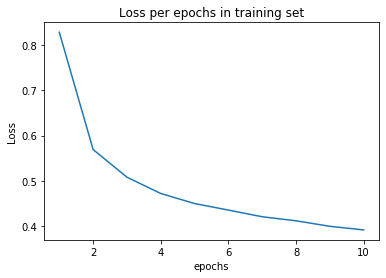

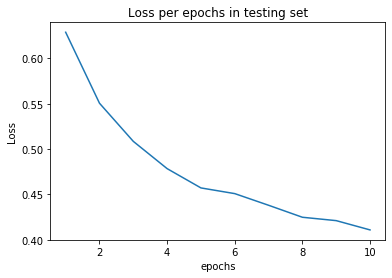

In [0]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9,10],train_loss)
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.title("Loss per epochs in training set")
plt.show()

plt.plot([1,2,3,4,5,6,7,8,9,10],test_loss)
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.title("Loss per epochs in testing set")
plt.show()

In [0]:
X_Train = []
Y_Train = []
for images, labels in train_loader:
    images = Variable(images)
    output = net(images)
    for i in range(len(output)):
        X_Train.append(list(np.array(output.detach())[i]))
    for i in range(len(labels)):
        Y_Train.append(np.array(labels)[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)



X = []
Y = []
for images, labels in test_loader:
    images = Variable(images)
    output = net(images)
    for i in range(len(output)):
        X.append(list(np.array(output.detach())[i]))
    for i in range(len(labels)):
        Y.append(np.array(labels)[i])

X = np.array(X)
Y = np.array(Y)

from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma='scale')
clf.fit(X_Train,Y_Train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred_train = clf.predict(X_Train)
c = confusion_matrix(Y_Train,pred_train)
accuracy = (pred_train==Y_Train).mean()
print("Training accuracy : ",accuracy)
print(c)
print()
pred_test = clf.predict(X)
c = confusion_matrix(Y,pred_test)
accuracy = (pred_test==Y).mean()
print("Testing accuracy : ",accuracy)
print(c)

Training accuracy :  0.8674833333333334
[[5135    6   87  223   25   10  435    0   77    2]
 [   9 5811    9  134   14    2   16    0    4    1]
 [  85    8 4743   46  602    3  476    0   37    0]
 [ 184   53   30 5366  190    1  160    1   13    2]
 [  13   11  436  218 4828    0  476    0   18    0]
 [   3    0    0    1    0 5667    0  222   33   74]
 [1115   12  625  187  571    3 3417    0   70    0]
 [   0    0    0    0    0  162    0 5604   10  224]
 [  26    4   42   25   26   27   73   11 5764    2]
 [   0    1    0    0    1   61    0  216    7 5714]]

Testing accuracy :  0.8614
[[845   0  19  38   9   1  69   0  19   0]
 [  2 963   1  24   5   0   3   0   2   0]
 [ 17   2 777  10 108   0  82   0   4   0]
 [ 27   4  14 890  25   0  38   0   2   0]
 [  2   2  87  43 784   0  80   0   2   0]
 [  0   0   0   1   0 939   0  40   2  18]
 [179   4 100  27 106   0 567   0  17   0]
 [  0   0   0   0   0  25   0 939   1  35]
 [  2   1   7   4   3   2  14   4 962   1]
 [  0   0   0 